<a href="https://colab.research.google.com/github/edcalderin/DeepLearning_SaturdaysAI/blob/master/Tareas/Tarea_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea: GAN
### Grupo: XXXXX
Integrantes:
<br>
* Integrante 1 
* Integrante 2
* Integrante 3
* Integrante 4
<br>

Indicaciones:
<rb>
* Debe realizar la siguiente tarea hasta el 04 de julio, 23:59 UTC - 4
* Debe hacer una copia de este notebook para poder editar el código.
* Una vez finalizado el trabajo debe subir el link de su notebook (con permisos de lector) en la sección de "Tareas" del módulo correspondiente

Para la tarea se puede elegir una de tres opciones:


A) Partiendo de la red GAN vista en clase tomar otro dataset y entrenar para él. Por ejemplo se puede usar el dataset: https://ai.stanford.edu/~jkrause/cars/car_dataset.html

B) Partiendo de la red GAN vista en clase, utilizando MNIST, trabajar con la red DCGAN: https://arxiv.org/pdf/1511.06434.pdf

C) Realizar A y B al mismo tiempo


Se deja a modo de ejemplo parte del código de un posible discriminador para la opción B) a continuación y código auxiliar para obtener el dataset de A).

Se recomienda si se realizan entrenamientos muy largos ejecutar el código en una instancia cloud, no en Colab.


In [78]:
from torchvision.datasets.utils import download_url
from torchvision import transforms
from torchvision import datasets

In [75]:
import torch
from torch import nn
from torch.utils.data import DataLoader, dataset

In [79]:
import os
import tarfile
import matplotlib.pyplot as plt
import PIL

## Parte A

In [77]:
DATASET_URL = 'https://s3.amazonaws.com/fast-ai-imageclas/stanford-cars.tgz'
download_url(dataset_url, '.')
with tarfile.open('./stanford-cars.tgz', 'r:gz' ) as tar:
                  tar.extractall(path= './cars_data')
DATA_DIR = './cars_data/stanford-cars'
TRAIN_DIR = DATA_DIR + '/cars_train'
TEST_DIR = DATA_DIR + '/cars_test'
print(os.listdir(DATA_DIR))
len(TRAIN_DIR)

Using downloaded and verified file: ./stanford-cars.tgz
['cars_annos.mat', 'cars_test', 'cars_train']


36

### Previsualización

In [80]:
print('Imagenes en entrenamiento')
!ls $TRAIN_DIR | wc -l

print('\nImagenes en test')
!ls $TEST_DIR | wc -l

print('\nNombres')
!ls $TRAIN_DIR | head -4

Imagenes en entrenamiento
8144

Imagenes en test
8041

Nombres
00001.jpg
00002.jpg
00003.jpg
00004.jpg


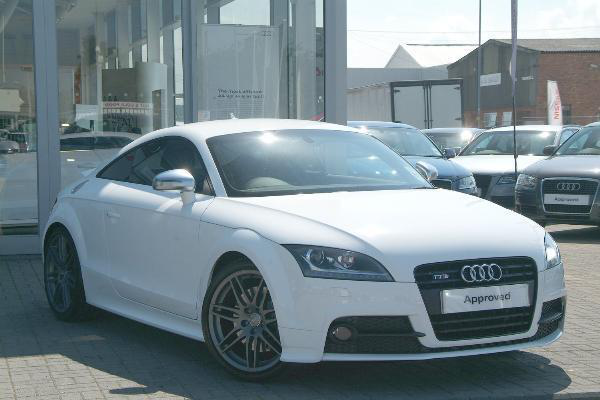

In [81]:
img = PIL.Image.open(TRAIN_DIR + '/00001.jpg')
img

### Red

In [65]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [66]:
IMAGE_DIM = (32, 32, 3)
def get_sample_image(G, n_noise):
    """
        save sample 100 images
    """
    z = torch.randn(10, n_noise).to(device)
    y_hat = G(z).view(10, 3, 32, 32).permute(0, 2, 3, 1) # (100, 28, 28)
    result = (y_hat.detach().cpu().numpy()+1)/2.
    return result

In [67]:
class Discriminator(nn.Module):
    """
        Simple Discriminator w/ MLP
    """
    def __init__(self, input_size=784, num_classes=1):
        super(Discriminator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, num_classes),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        y_ = x.view(x.size(0), -1)
        y_ = self.layer(y_)
        return y_

In [68]:
class Generator(nn.Module):
    """
        Simple Generator w/ MLP
    """
    def __init__(self, input_size=100, num_classes=784):
        super(Generator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, num_classes),
            nn.Tanh()
        )
        
    def forward(self, x):
        y_ = self.layer(x)
        y_ = y_.view(x.size(0), 1, 28, 28)
        return y_

In [69]:
n_noise = 100

In [70]:
D = Discriminator().to(device)
G = Generator(n_noise).to(device)

In [71]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5], std=[0.5])
                                ]
)

In [85]:
train_data = datasets.ImageFolder(root=DATA_DIR, transform=transform)
#test_data = datasets.ImageFolder(root=TEST_DIR, transform=transform)

In [74]:
BATCH_SIZE = 64

In [ ]:
data_loader = DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True, drop_last=True)

## Parte B

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, in_channel=1, num_classes=1):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            # Reduce size
            nn.Conv2d(in_channel, 512, 3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),
            # Reduce size
            # @TODO

            # Reduce size
            # @TODO
            
            # 
            nn.Conv2d(128, 128, 3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.AdaptiveAvgPool2d(1),
        )        
        self.fc = nn.Sequential(
            # reshape input, 128 -> 1
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )
    
    def forward(self, x, y=None):
        y_ = self.conv(x)
        y_ = y_.view(y_.size(0), -1)
        y_ = self.fc(y_)
        return y_

In [9]:
# Recordar que a diferencia de MNIST ahora se está trabajando con imágenes a color por lo que cambian las dimensiones
transform = transforms.Compose([transforms.Resize((IMAGE_DIM[0],IMAGE_DIM[1])),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, 0.5, 0.5),
                                std=(0.5, 0.5, 0.5))
                               ])

In [ ]:
data_loader = DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True, drop_last=True)